In [2]:
import pandas as pd

In [3]:
df_al = pd.read_csv('e:/DS/data/flight-delays/airlines.csv',sep=',')
df_al.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
IATA_CODE    14 non-null object
AIRLINE      14 non-null object
dtypes: object(2)
memory usage: 304.0+ bytes


In [4]:
df_ap = pd.read_csv('e:/DS/data/flight-delays/airports.csv',sep=',')
df_ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
IATA_CODE    322 non-null object
AIRPORT      322 non-null object
CITY         322 non-null object
STATE        322 non-null object
COUNTRY      322 non-null object
LATITUDE     319 non-null float64
LONGITUDE    319 non-null float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


In [5]:
df_f = pd.read_csv('e:/DS/data/flight-delays/flights.csv',sep=',')
df_f.info()

E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
YEAR                   int64
MONTH                  int64
DAY                    int64
DAY_OF_WEEK            int64
AIRLINE                object
FLIGHT_NUMBER          int64
TAIL_NUMBER            object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
SCHEDULED_DEPARTURE    int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE               int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL      int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED               int64
CANCELLED              int64
CANCELLATION_REASON    object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT

In [34]:
df_f[df_f.DEPARTURE_DELAY>5].groupby('AIRLINE').agg({'DEPARTURE_DELAY':max}).sort_values(['DEPARTURE_DELAY'],ascending=False)


,DEPARTURE_DELAY
AIRLINE,
AA,1988.0
MQ,1544.0
HA,1433.0
OO,1378.0
UA,1314.0
DL,1289.0
EV,1274.0
F9,1112.0
B6,1006.0


In [14]:
df_top = df_f[df_f.DEPARTURE_DELAY>5].groupby('AIRLINE')['DEPARTURE_DELAY'].mean().to_frame().sort_values(['DEPARTURE_DELAY'], ascending = False)
df_top

,DEPARTURE_DELAY
AIRLINE,
F9,54.254258
EV,51.293558
NK,50.642953
OO,49.373385
MQ,48.899258
B6,46.818644
AA,46.300043
UA,44.905539
DL,41.756171


In [30]:
df_ = df_f.loc[df_f['AIRLINE'].isin(['F9'])]
F9 = df_.groupby(['AIRLINE', 'MONTH']).mean()
df_ = df_f.loc[df_f['AIRLINE'].isin(['EV'])]
EV = df_.groupby(['AIRLINE', 'MONTH']).mean()
df_ = df_f.loc[df_f['AIRLINE'].isin(['NK'])]
NK = df_.groupby(['AIRLINE', 'MONTH']).mean()
df_ = df_f.loc[df_f['AIRLINE'].isin(['OO'])]
OO = df_.groupby(['AIRLINE', 'MONTH']).mean()
df_ = df_f.loc[df_f['AIRLINE'].isin(['MQ'])]
MQ = df_.groupby(['AIRLINE', 'MONTH']).mean()



Определим зависимость задеджек от времени года. На основе 5ти авиакомпаний, самыми большими задержками

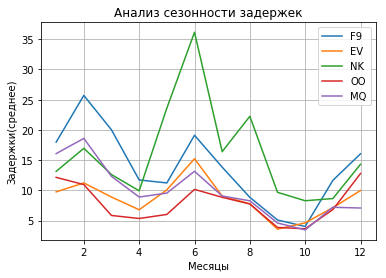

In [32]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
t = np.arange(1, 13, 1)

fig, ax = plt.subplots()
ax.plot(t, F9.DEPARTURE_DELAY, label='F9')
ax.plot(t, EV.DEPARTURE_DELAY, label='EV')
ax.plot(t, NK.DEPARTURE_DELAY, label='NK')
ax.plot(t, OO.DEPARTURE_DELAY, label='OO')
ax.plot(t, MQ.DEPARTURE_DELAY, label='MQ')



ax.set(xlabel='Месяцы', ylabel='Задержки(среднее)',
       title='Анализ сезонности задержек')
ax.grid()
plt.legend()
plt.show()

In [ ]:
Судя по графику можно предположить, что проблема в перегруженности аэропортов, в пиковые периоды сезона

In [34]:
df_f[df_f.DEPARTURE_DELAY>5].groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].sum().to_frame().sort_values(['DEPARTURE_DELAY'], ascending = False)

,DEPARTURE_DELAY
DAY_OF_WEEK,
1,11198811.0
4,10586722.0
5,10039629.0
2,9788157.0
7,9546815.0
3,9501082.0
6,7276574.0


In [56]:
df_f['IATA_CODE'] = df_f['ORIGIN_AIRPORT']
result = pd.merge(df_f, df_ap[['IATA_CODE', 'CITY', 'STATE', 'COUNTRY']], on='IATA_CODE')



,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE,CITY,STATE,COUNTRY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,NaN,NaN,NaN,NaN,NaN,NaN,ANC,Anchorage,AK,USA
1,2015,1,1,4,AS,108,N309AS,ANC,SEA,45,...,NaN,NaN,NaN,NaN,NaN,NaN,ANC,Anchorage,AK,USA
2,2015,1,1,4,DL,1560,N3743H,ANC,SEA,45,...,NaN,NaN,NaN,NaN,NaN,NaN,ANC,Anchorage,AK,USA
3,2015,1,1,4,AS,122,N413AS,ANC,PDX,50,...,NaN,NaN,NaN,NaN,NaN,NaN,ANC,Anchorage,AK,USA
4,2015,1,1,4,AS,136,N431AS,ANC,SEA,135,...,A,NaN,NaN,NaN,NaN,NaN,ANC,Anchorage,AK,USA


In [61]:
df_from = result[result.DEPARTURE_DELAY>5].groupby('CITY')['DEPARTURE_DELAY'].count().to_frame().sort_values(['DEPARTURE_DELAY'], ascending = False).head(15)


,DEPARTURE_DELAY
CITY,
Chicago,124285
Atlanta,93492
Dallas-Fort Worth,73006
Denver,66195
Houston,63980
Los Angeles,60554
New York,55892
San Francisco,43512
Phoenix,42753


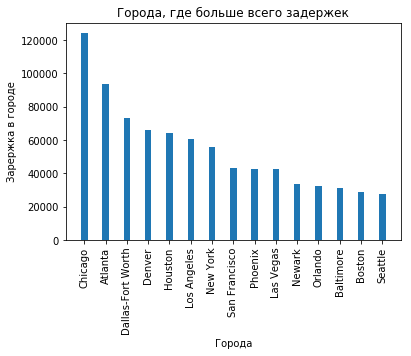

In [64]:
from matplotlib import pyplot as plt


plt.bar(df_from.index,df_from.DEPARTURE_DELAY,width=.3)
plt.xticks(df_from.index, df_from.index, rotation='vertical')
plt.xlabel('Города')
plt.ylabel('Зарержка в городе')
plt.title('Города, где больше всего задержек')
plt.show()

In [ ]:
Анализ причин отмены рейсоы
CANCELLATION_REASONReason A - Airline/Carrier; B - Weather; C - National Air System; D - Security

In [41]:
df_reasons = df_f[df_f.DEPARTURE_DELAY>5].groupby('CANCELLATION_REASON')['DEPARTURE_DELAY'].sum().to_frame().sort_values(['CANCELLATION_REASON'], ascending = True)
df_reasons

,DEPARTURE_DELAY
CANCELLATION_REASON,
A,93279.0
B,106008.0
C,19943.0
D,62.0


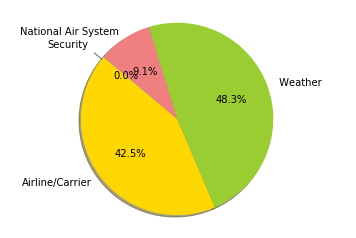

In [45]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'Airline/Carrier', ' Weather', 'National Air System', 'Security'
sizes = [215, 130, 245, 210]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0, 0.1)  # explode 1st slice
 
# Plot
plt.pie(df_reasons.DEPARTURE_DELAY, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [51]:
df_reasons2 = df_f[df_f.DEPARTURE_DELAY>5].groupby('MONTH')['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'].mean().sort_values(['MONTH'], ascending = True)
df_reasons2

,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
MONTH,,,,,
1,11.124572,0.082115,20.961968,26.902825,3.214784
2,11.982197,0.056338,21.055770,26.648567,5.053768
3,10.766522,0.080481,22.209416,26.445569,2.765810
4,11.278863,0.052862,21.662282,26.023288,3.190376
5,11.947909,0.073645,21.528566,28.147873,4.338621
6,12.336248,0.068805,22.379904,29.882130,3.709472
7,10.460909,0.071751,21.277301,29.370943,2.440804
8,11.634704,0.145396,22.036437,27.277541,3.222283
9,10.502868,0.119614,23.567565,23.834625,2.724871


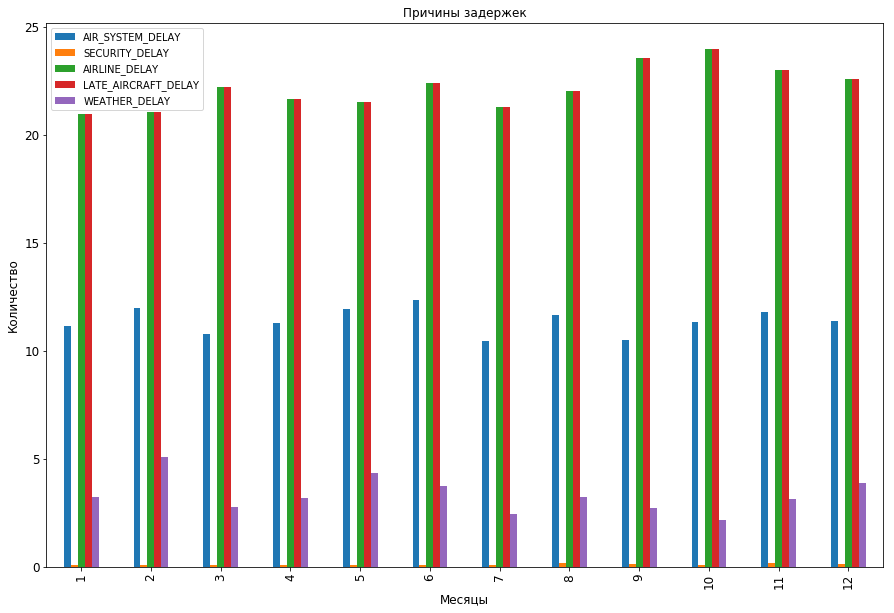

In [54]:
ax = df_reasons2[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY','AIRLINE_DELAY', 'AIRLINE_DELAY', 'WEATHER_DELAY']].plot(kind='bar', title ="Причины задержек", figsize=(15, 10), legend=True, fontsize=12)

ax.set_xlabel("Месяцы", fontsize=12)
ax.set_ylabel("Количество", fontsize=12)
ax.set_xticklabels(df_reasons2.index)
ax.legend(['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'])
plt.show()